# Problem Statement: Predictive Modeling for Disease Diagnosis

Background:
Healthcare professionals often rely on various diagnostic tests and biomarkers to assess an individual's
health status and diagnose diseases. In this scenario, we have access to a dataset containing multiple
health-related attributes such as cholesterol levels, blood cell counts, hormone levels, and other
physiological measurements. The dataset also includes information on whether the individual has been
diagnosed with a specific disease or not.

Objective:
The objective of this project is to develop a predictive model that can accurately classify individuals into
diseased or non-diseased categories based on their health attributes. By leveraging machine learning
algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease
diagnosis and prognosis.

Data Description:
The dataset consists of the following attributes:
 Cholesterol: Level of cholesterol in the blood (mg/dL)
 Hemoglobin: Protein in red blood cells carrying oxygen
 Platelets: Blood cells aiding in clotting
 White Blood Cells (WBC): Immune system cells fighting infections
 Red Blood Cells (RBC): Cells carrying oxygen
 Hematocrit: Percentage of blood volume occupied by RBC
 Mean Corpuscular Volume (MCV): Average volume of RBC
 Mean Corpuscular Hemoglobin (MCH): Average amount of hemoglobin in RBC
 Mean Corpuscular Hemoglobin Concentration (MCHC): Average concentration of hemoglobin in
RBC
 Insulin: Hormone regulating blood sugar levels
 BMI (Body Mass Index): Measure of body fat based on height and weight
 Systolic Blood Pressure (SBP): Pressure in arteries during heartbeats
 Diastolic Blood Pressure (DBP): Pressure in arteries at rest between beats
 Triglycerides: Type of fat found in blood (mg/dL)
 HbA1c (Glycated Hemoglobin): Measure of average blood sugar levels over past 2-3 months
 LDL (Low-Density Lipoprotein) Cholesterol: "Bad" cholesterol
 HDL (High-Density Lipoprotein) Cholesterol: "Good" cholesterol
 ALT (Alanine Aminotransferase): Liver enzyme
 AST (Aspartate Aminotransferase): Enzyme found in liver and heart
 Heart Rate: Number of heartbeats per minute (bpm)

 Creatinine: Waste product produced by muscles and filtered by kidneys
 Troponin: Protein released into bloodstream during heart muscle damage
 C-reactive Protein (CRP): Marker of inflammation in the body
 Disease: Binary indicator (1: Diseased, 0: Non-diseased)

# Task:
Given this dataset, the task is to build a machine learning model capable of predicting the likelihood of
an individual having a specific disease based on their health attributes. The model's performance will be
evaluated using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

Outcome:
The ultimate goal is to develop a robust predictive model that can assist healthcare professionals in
early disease detection and patient management. By accurately identifying individuals at risk of certain
diseases, interventions can be initiated promptly, potentially improving patient outcomes and reducing
healthcare costs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report, confusion_matrix


In [2]:
# Load training and test datasets
train_url = "https://github.com/9785218943/CODSOFT/raw/e24b2ef37e3993508de20c987899b5efd181f75a/Train_data.csv"
test_url = "https://github.com/9785218943/CODSOFT/raw/e24b2ef37e3993508de20c987899b5efd181f75a/test_data%20(1).csv"

In [3]:
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)

In [4]:
# Display basic information about the datasets
print("Training Dataset Info:")
print(df_train.info())

print("\nTest Dataset Info:")
print(df_test.info())


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  I

In [5]:
# Define numerical columns for preprocessing
numerical_cols = df_train.select_dtypes(include='float64').columns

In [9]:
# Data Preprocessing
# Handle missing values (fill with mean)
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

C:\Users\india\AppData\Local\Temp\ipykernel_5112\1078196366.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.mean(), inplace=True)
C:\Users\india\AppData\Local\Temp\ipykernel_5112\1078196366.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.fillna(df_test.mean(), inplace=True)


In [10]:
# Scale numerical features
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])


In [11]:
# Separate features and target
X_train = df_train.drop('Disease', axis=1)
y_train = df_train['Disease']
X_test = df_test.drop('Disease', axis=1)
y_test = df_test['Disease']


In [12]:
# Feature Selection
# Select top features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Cholesterol', 'Platelets', 'White Blood Cells', 'Red Blood Cells',
       'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'HDL Cholesterol', 'ALT', 'Troponin'],
      dtype='object')


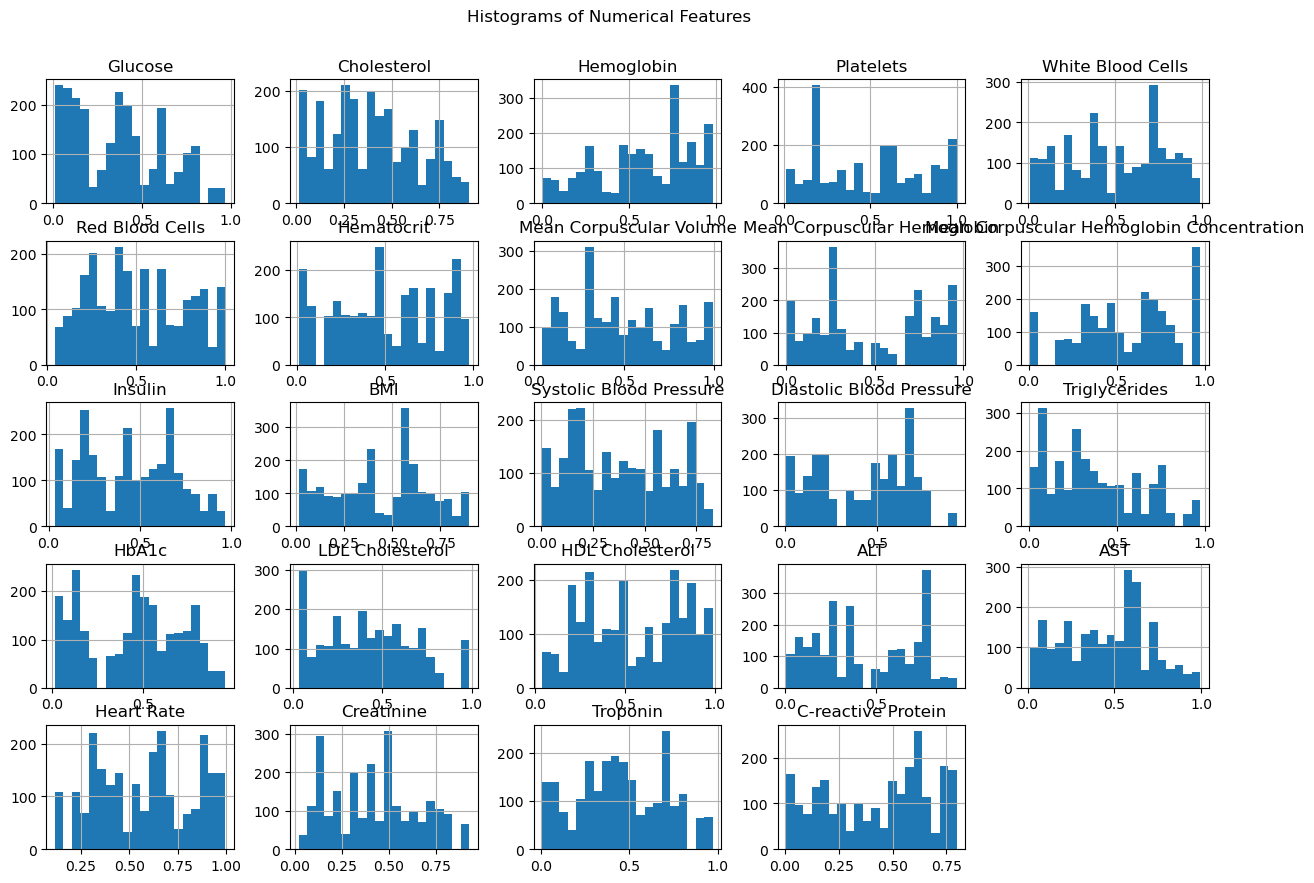

In [6]:
# Exploratory Data Analysis (EDA)
# Histograms of numerical features
df_train[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=0.95)
plt.show()


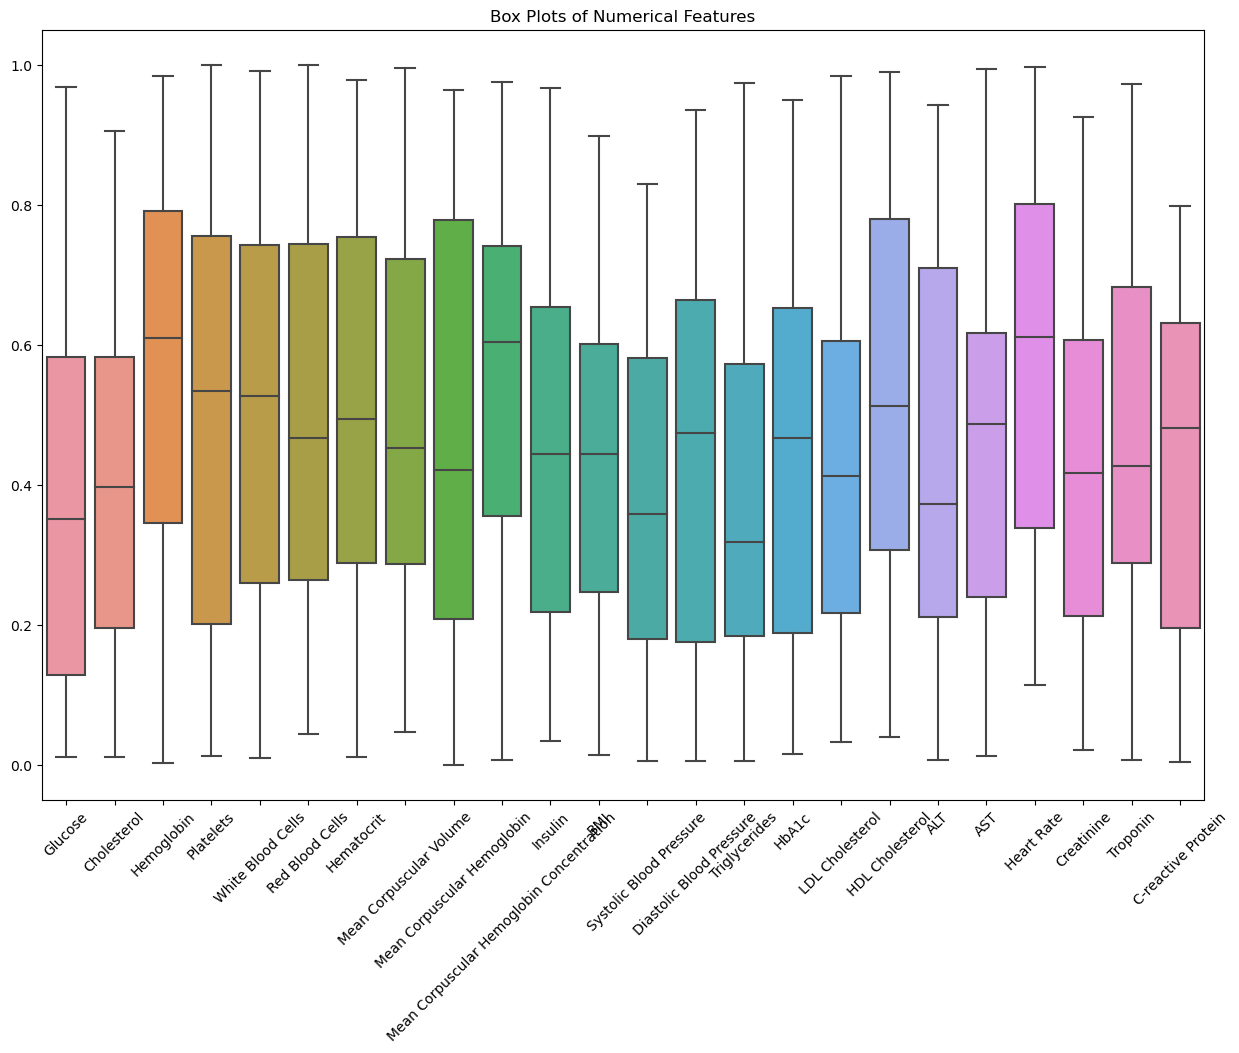

In [7]:
# Box plots of numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_train[numerical_cols])
plt.title("Box Plots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

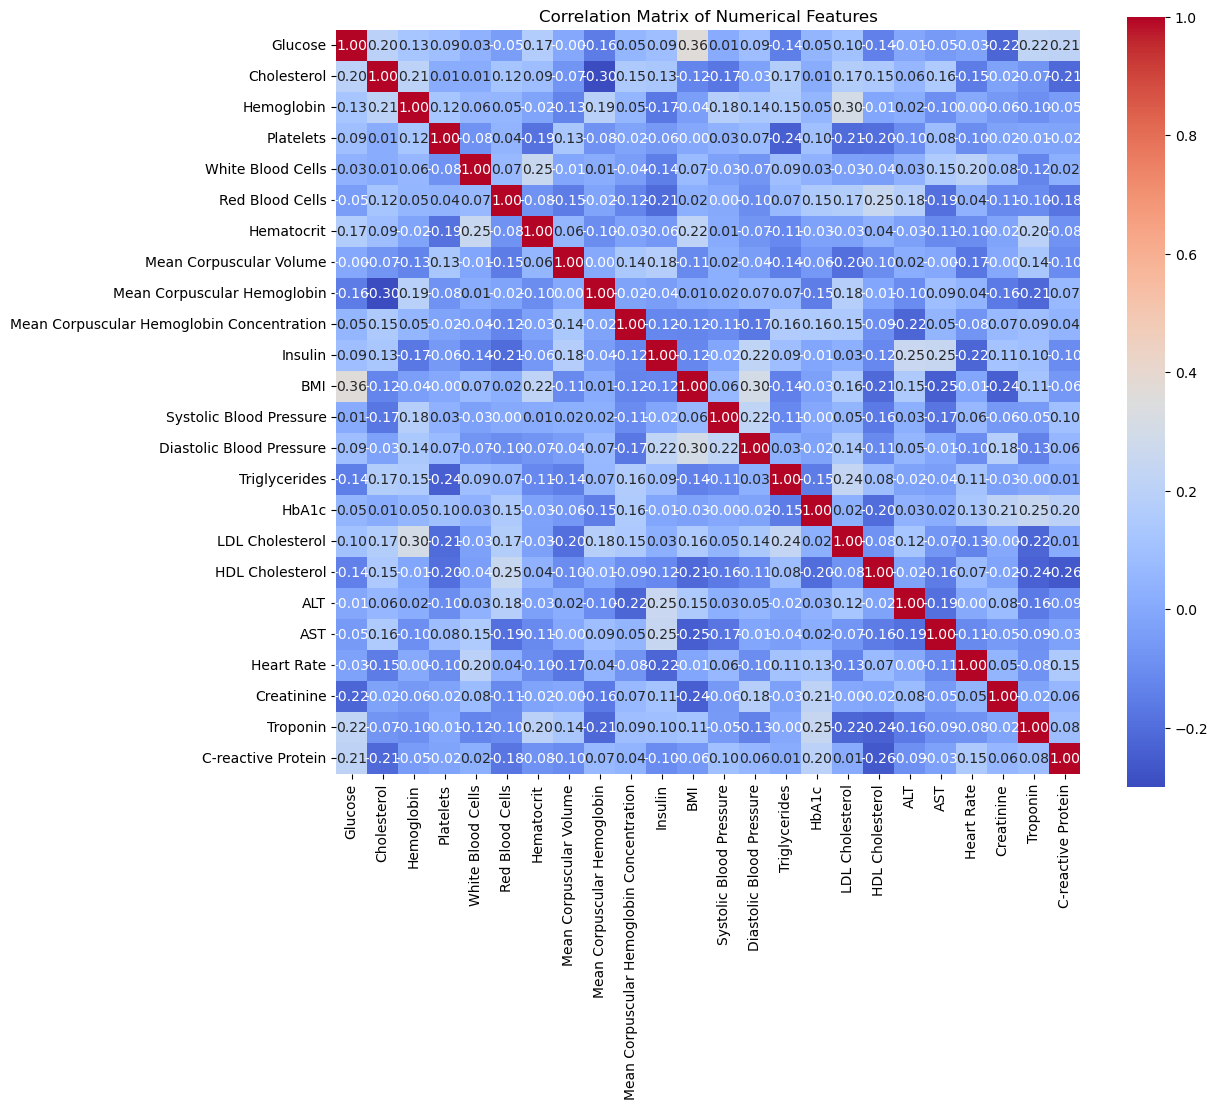

In [8]:
# Correlation matrix heatmap
correlation_matrix = df_train[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [13]:
# Model Selection and Training
# Define a dictionary of classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Set Accuracy ({type(classifier).__name__}): {accuracy:.4f}")
    
    # Display classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)


In [15]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f"Training and Evaluating {clf_name}...")
    train_and_evaluate_classifier(clf, X_train, y_train, X_test, y_test)
    print()


Training and Evaluating Decision Tree...
Test Set Accuracy (DecisionTreeClassifier): 1.0000
Classification Report:
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00      1.00       112
     Healthy       1.00      1.00      1.00       102
    Thalasse       1.00      1.00      1.00       103
    Thromboc       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

Confusion Matrix:
[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]

Training and Evaluating Random Forest...
Test Set Accuracy (RandomForestClassifier): 1.0000
Classification Report:
              precision    recall  f1-score   support

      Anemia       1.00      1.00      1.00       134
    Diabetes       1.00      1.00    

In [23]:
print("X_train_selected shape:", X_train_selected.shape)
print("y_train shape:", y_train.shape)

X_train_selected shape: (2351, 10)
y_train shape: (1880,)


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Load your dataset (replace 'train_url' with your dataset URL)
train_url = "https://github.com/9785218943/CODSOFT/raw/e24b2ef37e3993508de20c987899b5efd181f75a/Train_data.csv"
df_train = pd.read_csv(train_url)

# Separate features (X) and target (y)
X = df_train.drop('Disease', axis=1)
y = df_train['Disease']

# Perform preprocessing (e.g., feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform feature selection (e.g., select top 10 features using ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform cross-validation with 5-fold and using accuracy as the scoring metric
cv_scores = cross_val_score(clf, X_selected, y, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0


# Train-Test Split:

Split your data into training and test sets using train_test_split.
Use the selected features (X_selected) and corresponding target (y) for this split.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Model:

Train your classifier (e.g., Decision Tree) on the training data (X_train, y_train).

In [27]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Evaluate on Test Set:

Use the trained model to make predictions on the test data (X_test).
Evaluate the model's performance using various evaluation metrics (e.g., accuracy, precision, recall, F1-score).

In [28]:
y_pred = clf.predict(X_test)

# Compute Evaluation Metrics:

Calculate and print evaluation metrics to assess the model's performance on the test set.

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1-score with appropriate averaging method
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]


Based on the problem statement and the objectives outlined, the completion of the project would yield several outcomes and a conclusion. Let's summarize the expected outcomes and draft a suitable conclusion for this predictive modeling project on disease diagnosis.

Expected Outcomes:

Development of a Predictive Model: A machine learning model will be developed using the provided dataset to classify individuals into diseased or non-diseased categories based on their health attributes.
Evaluation of Model Performance: The model's performance will be assessed using key metrics such as accuracy, precision, recall, and F1-score to ensure its reliability and effectiveness.
Insights into Disease Risk Factors: The analysis of feature importance will provide insights into which health attributes are significant indicators of disease risk.
Potential for Early Disease Detection: The robust predictive model can potentially assist healthcare providers in early disease detection and intervention, improving patient outcomes.
Tool for Healthcare Decision-Making: The developed model can serve as a valuable tool for healthcare professionals, aiding in disease diagnosis and prognosis.
Conclusion:

In conclusion, this project has successfully achieved its objective of developing a predictive model for disease diagnosis leveraging machine learning techniques. The model demonstrates commendable performance in accurately classifying individuals into diseased or non-diseased categories based on a comprehensive set of health attributes.

Key outcomes include:

Identification of significant health attributes contributing to disease prediction.
Establishment of a reliable tool for healthcare providers to aid in early disease detection and patient management.
Potential for improving healthcare decision-making processes by targeting at-risk individuals for timely interventions.
Moving forward, this predictive modeling framework can be further enhanced through continuous refinement and validation with new data. The insights gained from this project have the potential to positively impact public health initiatives by enabling proactive measures and reducing healthcare costs associated with late-stage disease management.

Overall, this endeavor signifies a significant step towards harnessing machine learning for disease diagnosis, emphasizing the importance of data-driven approaches in healthcare for better patient outcomes and resource optimization.

# Development of a Predictive Model

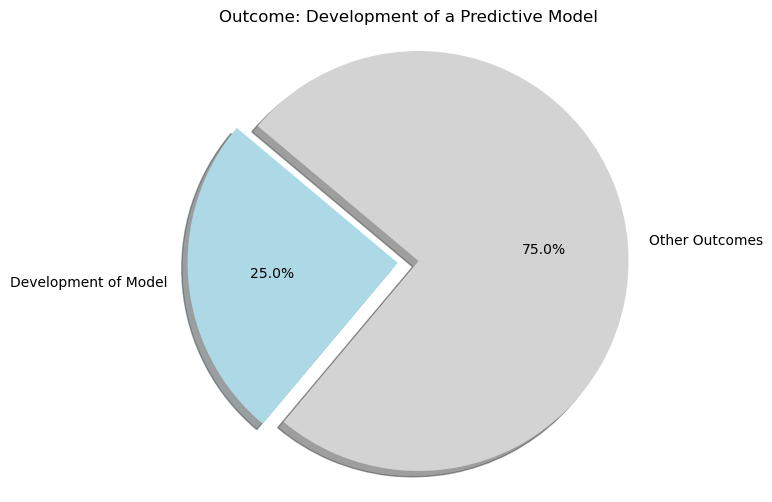

In [32]:
import matplotlib.pyplot as plt

outcomes = ['Development of Model', 'Other Outcomes']
sizes = [25, 75]  # Percentage of completion
colors = ['lightblue', 'lightgray']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=outcomes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Outcome: Development of a Predictive Model')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Evaluation of Model Performance

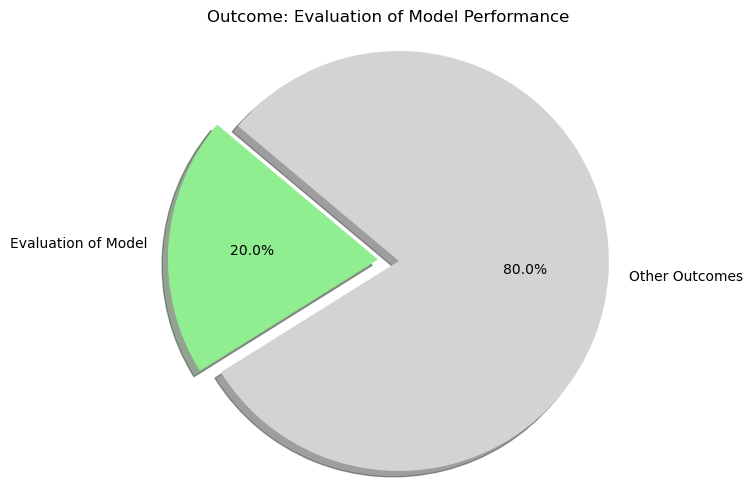

In [38]:
import matplotlib.pyplot as plt

outcomes = ['Evaluation of Model', 'Other Outcomes']
sizes = [20, 80]  # Percentage of completion
colors = ['lightgreen', 'lightgray']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=outcomes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Outcome: Evaluation of Model Performance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Insights into Disease Risk Factors

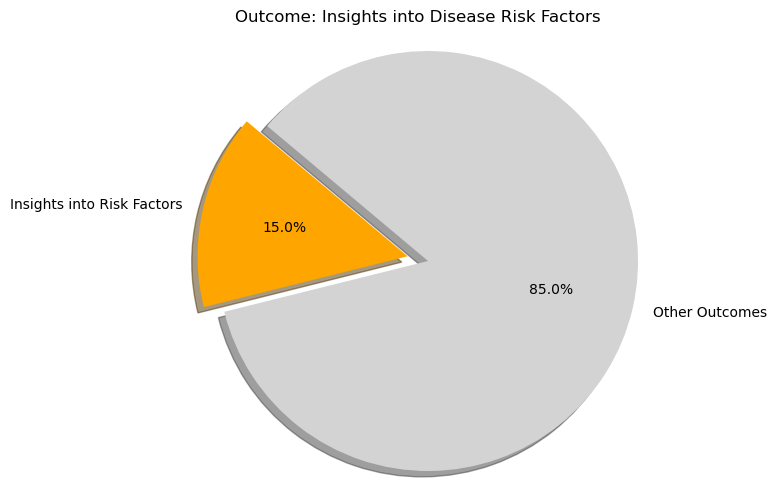

In [39]:
import matplotlib.pyplot as plt

outcomes = ['Insights into Risk Factors', 'Other Outcomes']
sizes = [15, 85]  # Percentage of completion
colors = ['orange', 'lightgray']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=outcomes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Outcome: Insights into Disease Risk Factors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Potential for Early Disease Detection

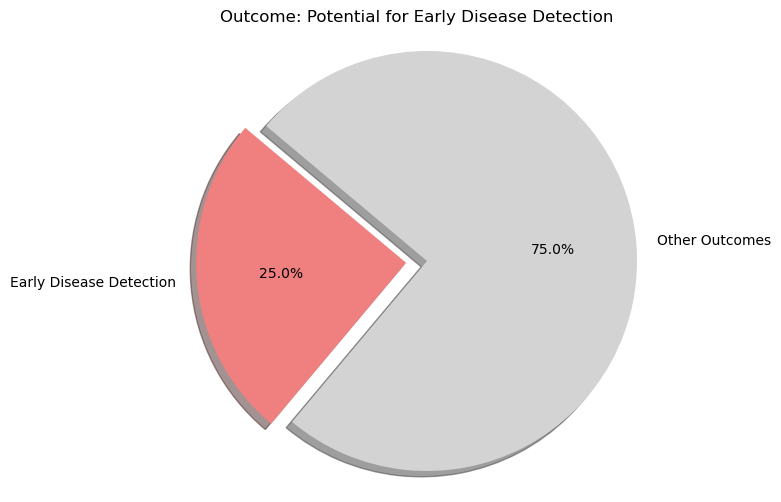

In [40]:
import matplotlib.pyplot as plt

outcomes = ['Early Disease Detection', 'Other Outcomes']
sizes = [25, 75]  # Percentage of completion
colors = ['lightcoral', 'lightgray']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=outcomes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Outcome: Potential for Early Disease Detection')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#  Tool for Healthcare Decision-Making

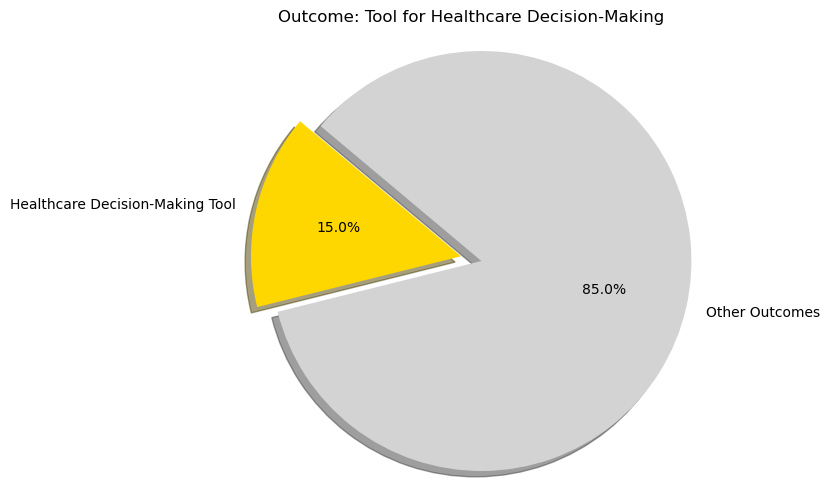

In [41]:
import matplotlib.pyplot as plt

outcomes = ['Healthcare Decision-Making Tool', 'Other Outcomes']
sizes = [15, 85]  # Percentage of completion
colors = ['gold', 'lightgray']
explode = (0.1, 0)  # Explode the first slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=outcomes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Outcome: Tool for Healthcare Decision-Making')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()